In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
def train_test_split_user(df, test_ratio):
    keys=data.groupby('screen_name').count().reset_index()['screen_name'].to_numpy()
    index=int(len(keys)*test_ratio)
    np.random.shuffle(keys)
    test=df[df['screen_name'].isin(keys[0:index])]
    train=df[df['screen_name'].isin(keys[index:])]
    return train, test
    
def create_X_y(df):
    X=df['clean_text'].to_numpy()
    y=df['age'].to_numpy()
    return X, y

In [12]:
#age>20=1, age<=20=0

labeled_users=pd.read_csv("./data/labeled_users.csv",lineterminator='\n')[['screen_name','age']]
#for weighted sampling:
#younger_user=labeled_users[labeled_users['age']==0]
#labeled_users=labeled_users[labeled_users['age']==1]
#younger_user=younger_user.sample(frac=0.5)
#labeled_users = labeled_users.append(younger_user, ignore_index=True)
cleaned_tweets=pd.read_excel("./data/cleaned_tweets.xlsx",engine='openpyxl')
data=pd.merge(cleaned_tweets, labeled_users, left_on='user_id', right_on='screen_name')
data=data[['screen_name','clean_text','age']]
data=data.dropna()
print(data.groupby('age').count())
train_all, test =train_test_split_user(data, 0.1)

     screen_name  clean_text
age                         
0.0        34952       34952
1.0        31660       31660


In [13]:
i=1
epochs=5
score=0
while i <= epochs:
    vectorizer = TfidfVectorizer(min_df=4)
    train, val= train_test_split_user(train_all, 0.2)
    train_X, train_y=create_X_y(train)
    val_X, val_y=create_X_y(test)
    train_X = vectorizer.fit_transform(train_X).todense()
    print(train_X.shape)
    val_X=vectorizer.transform(val_X)
    clf = LogisticRegression(random_state=0).fit(train_X, train_y)
    train_score=clf.score(train_X, train_y)
    val_score=clf.score(val_X,val_y)
    print(str(i)+") train: "+str(train_score))
    print(str(i)+") val: "+str(val_score))
    if score<val_score:
        score=val_score
        best_vectorizer=vectorizer
        best_model=clf
    i+=1

(48438, 8329)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1) train: 0.687456129485115
1) val: 0.5249587767950832
(47712, 8197)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2) train: 0.6919433266264252
2) val: 0.5222605306550742
(47951, 8350)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


3) train: 0.6882651039602928
3) val: 0.5333533203417778
(47593, 8290)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4) train: 0.6853528880297522
4) val: 0.5324539049617748
(48141, 8379)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


5) train: 0.6888307264078436
5) val: 0.5318542947084395


test score: 0.5333533203417778
              precision    recall  f1-score   support

      age<21       0.50      0.66      0.57      3132
     age>=21       0.58      0.42      0.49      3539

    accuracy                           0.53      6671
   macro avg       0.54      0.54      0.53      6671
weighted avg       0.55      0.53      0.53      6671



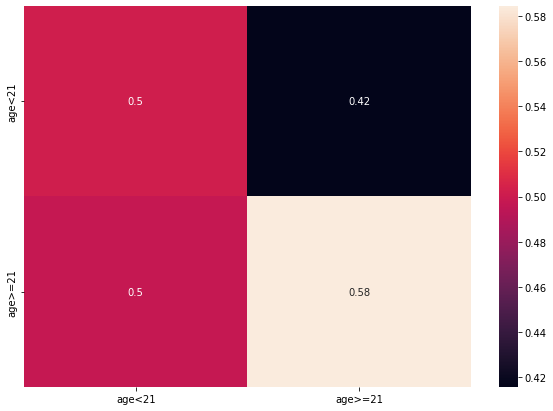

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
class_names=["age<21","age>=21"]
test_X, test_y=create_X_y(test)
test_X=best_vectorizer.transform(test_X)
test_pred=best_model.predict(test_X)
cm = confusion_matrix(test_y, test_pred, normalize='pred')
df_cm = pd.DataFrame(cm, index = class_names,
                  columns = class_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
test_score=best_model.score(test_X,test_y)
print("test score: "+str(test_score))
print(classification_report(test_y, test_pred, target_names=class_names))